In [1]:
import pandas
import os
import string
import itertools
import pickle
from biotite.sequence.phylo import upgma
from matplotlib import pyplot
from io import StringIO
from Bio import Phylo
from ete3 import Tree

In [2]:
data_path = "../../data"

In [3]:
types_map = dict(P="with Protein", N="with Nucleotides")

In [4]:
df = pandas.read_csv(f"{data_path}/final_cluster.csv")

In [5]:
df.describe()

,Right,Total
count,690.000000,690.000000
mean,12.547826,22.695652
std,10.933691,11.915650
min,0.000000,14.000000
25%,3.000000,14.000000
50%,13.000000,14.000000
75%,14.000000,39.000000
max,39.000000,39.000000


In [6]:
df.sort_values(by="Right").head(30)

,Type,Algorithm,Name,Family,Right,Total
465,P,Unrestricted Sliced Structural Similarity Inde...,D7.png,indelible,0,39
268,P,Windowed MultiScale Structural Similarity Inde...,B5.png,indelible,0,39
53,P,Resized Structural Similarity Index Measure,chlorocebus_sabaeus_ENSCSAG00000017175.png,orthologs_androglobin,0,14
499,P,Unrestricted Sliced Structural Similarity Inde...,D0.png,indelible,0,39
638,P,Universal Quality Index,carlito_syrichta_ENSTSYG00000029754.png,orthologs_cytoglobin,0,14
498,P,Unrestricted Sliced Structural Similarity Inde...,B5.png,indelible,0,39
49,P,Resized Structural Similarity Index Measure,prolemur_simus_ENSPSMG00000018921.png,orthologs_androglobin,0,14
56,P,Resized Structural Similarity Index Measure,pongo_abelii_ENSPPYG00000008661.png,orthologs_cytoglobin,0,14
48,P,Resized Structural Similarity Index Measure,otolemur_garnettii_ENSOGAG00000024602.png,orthologs_androglobin,0,14
496,P,Unrestricted Sliced Structural Similarity Inde...,C1.png,indelible,0,39


In [7]:
df.groupby(["Type", "Algorithm"]).apply(lambda x: x[x["Right"] == x["Total"]].Name.size / x.Name.size)

Type  Algorithm                                              
P     Greedy Sliced Structural Similarity Index Measure          0.260870
      Resized MultiScale Structural Similarity Index Measure     0.495652
      Resized Structural Similarity Index Measure                0.260870
      Universal Quality Index                                    0.730435
      Unrestricted Sliced Structural Similarity Index Measure    0.426087
      Windowed MultiScale Structural Similarity Index Measure    0.426087
dtype: float64

In [8]:
def color_clade(clade):
    green_pallete = [
        "darkolivegreen",
        "turquoise",
        "forestgreen",
        "green",
        "darkcyan",
        "teal",
        "mediumaquamarine",
        "seagreen",
        "limegreen",
        "mediumseagreen",
        "mediumspringgreen"]
    clade_colors = {
        "androglobin": "red",
        "cytoglobin": "orange",
        "neuroglobin": "blue",
        "myoglobin": "brown",
        "hemoglobin": "purple",
        "indelible": green_pallete
    }
    for name, color in clade_colors.items():
            if name in clade:
                return color if type(color) == str else color[int(clade[-1])]



In [9]:
def show_tree(types, alg, numpy_all):
    tree = upgma(abs(1.0-numpy_all))
    fig, ax = pyplot.subplots(1, 1, figsize=(10, 20), layout="constrained")
    newick = tree.to_newick(labels=list(fixed_df_all.columns), include_distance=False)
    newick = tree.to_newick(labels=["_".join(i.replace("-", "_").split("_")[1:]) for i in list(fixed_df_all.columns)], include_distance=False)
    with open(f"{data_path}/blast/{types}/db_blast {alg}.nw", "w") as f:
        f.write(newick)
    t = Phylo.read(StringIO(newick), "newick")
    #     t.ladderize()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{alg} {types_map[types]}")
    ax.axis('off')
    Phylo.draw(
        t,
        show_confidence=False,
        axes=ax,
        do_show=False,
        label_colors=color_clade,
        branch_labels=lambda clade: "" if not clade.name else "{:.2f}".format(
            clade.confidence) if clade.confidence else ""
    )
    pyplot.xlabel("")
    pyplot.ylabel("")
    pyplot.tight_layout()
    pyplot.show()

In [10]:
def calc_map(types, alg, fixed_df_all):
    by_homologues = {}
    only_homologues = {}
    for column in fixed_df_all.columns:
        name = column.split("_")[0] if len(column.split("_")) == 2 else column.split("_")[1]
        k = 40 if len(column.split("_")) == 2 else 14
        if name in by_homologues:
            by_homologues[name] += list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[name] += [i.split("_")[0] if len(i.split("_")) == 2 else i.split("_")[1] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]
        else:
            by_homologues[name] = list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[name] = [i.split("_")[0] if len(i.split("_")) == 2 else i.split("_")[1] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]

    #Precision, MAP
    print(f"--------{alg} {types_map[types]}--------")
    for h in only_homologues:
        print(h)
        print("Precision:", sum([i==h for i in only_homologues[h]])/len(only_homologues[h]))
        precision = [0]
        p_k = 0
        for i in only_homologues[h]:
            precision.append((i==h)+precision[-1])
        for k in range(1,len(precision)):
            p_k += precision[k]/k
        print("Mean Average Precision", p_k/len(only_homologues[h]))
        print("-------------------------------------------------")

--------Resized Structural Similarity Index Measure with Protein--------
indelible
Precision: 0.054375
Mean Average Precision 0.06260358813551994
-------------------------------------------------
androglobin
Precision: 0.06666666666666667
Mean Average Precision 0.045779142126483444
-------------------------------------------------
cytoglobin
Precision: 0.1619047619047619
Mean Average Precision 0.17746143160714628
-------------------------------------------------
hemoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
myoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
neuroglobin
Precision: 0.7428571428571429
Mean Average Precision 0.6922355751409691
-------------------------------------------------


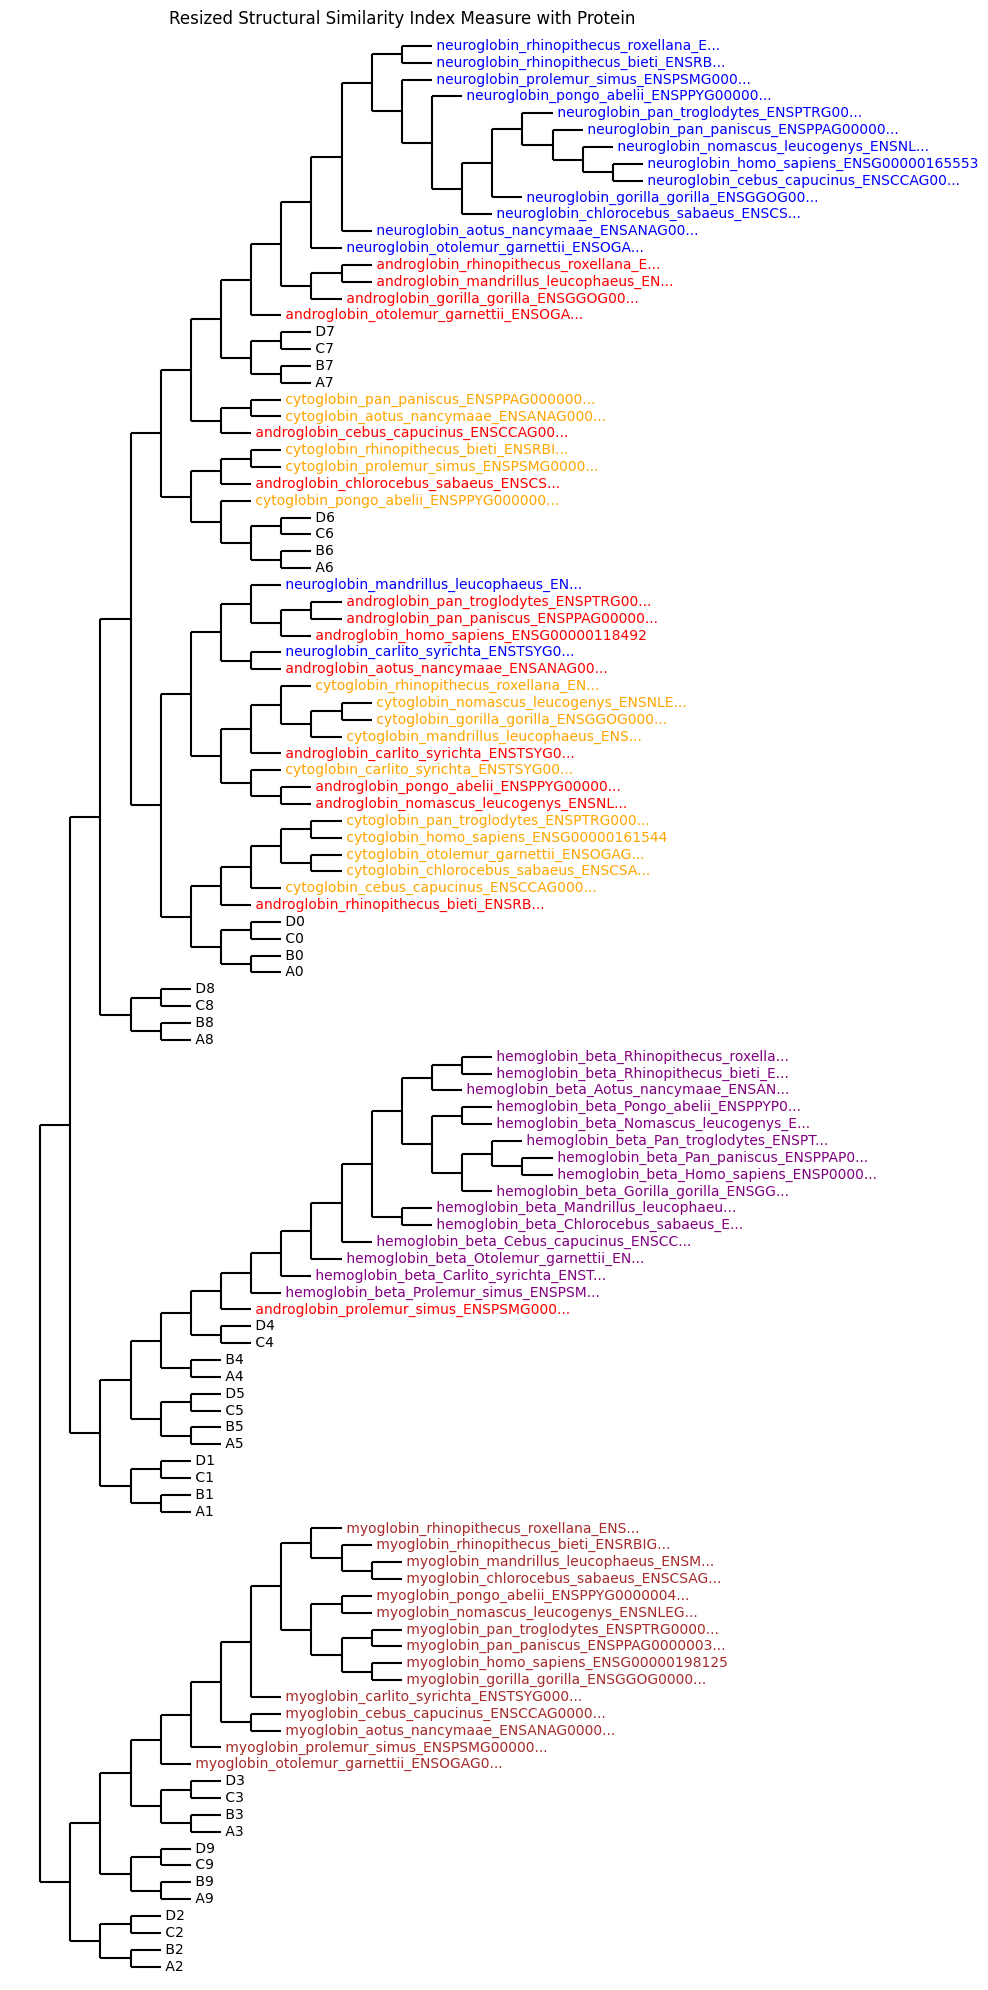

--------Resized MultiScale Structural Similarity Index Measure with Protein--------
indelible
Precision: 0.973125
Mean Average Precision 0.9753887851417457
-------------------------------------------------
androglobin
Precision: 0.8666666666666667
Mean Average Precision 0.9030845131822275
-------------------------------------------------
cytoglobin
Precision: 0.6333333333333333
Mean Average Precision 0.5862426435436952
-------------------------------------------------
hemoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
myoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
neuroglobin
Precision: 0.8047619047619048
Mean Average Precision 0.8374720970111587
-------------------------------------------------


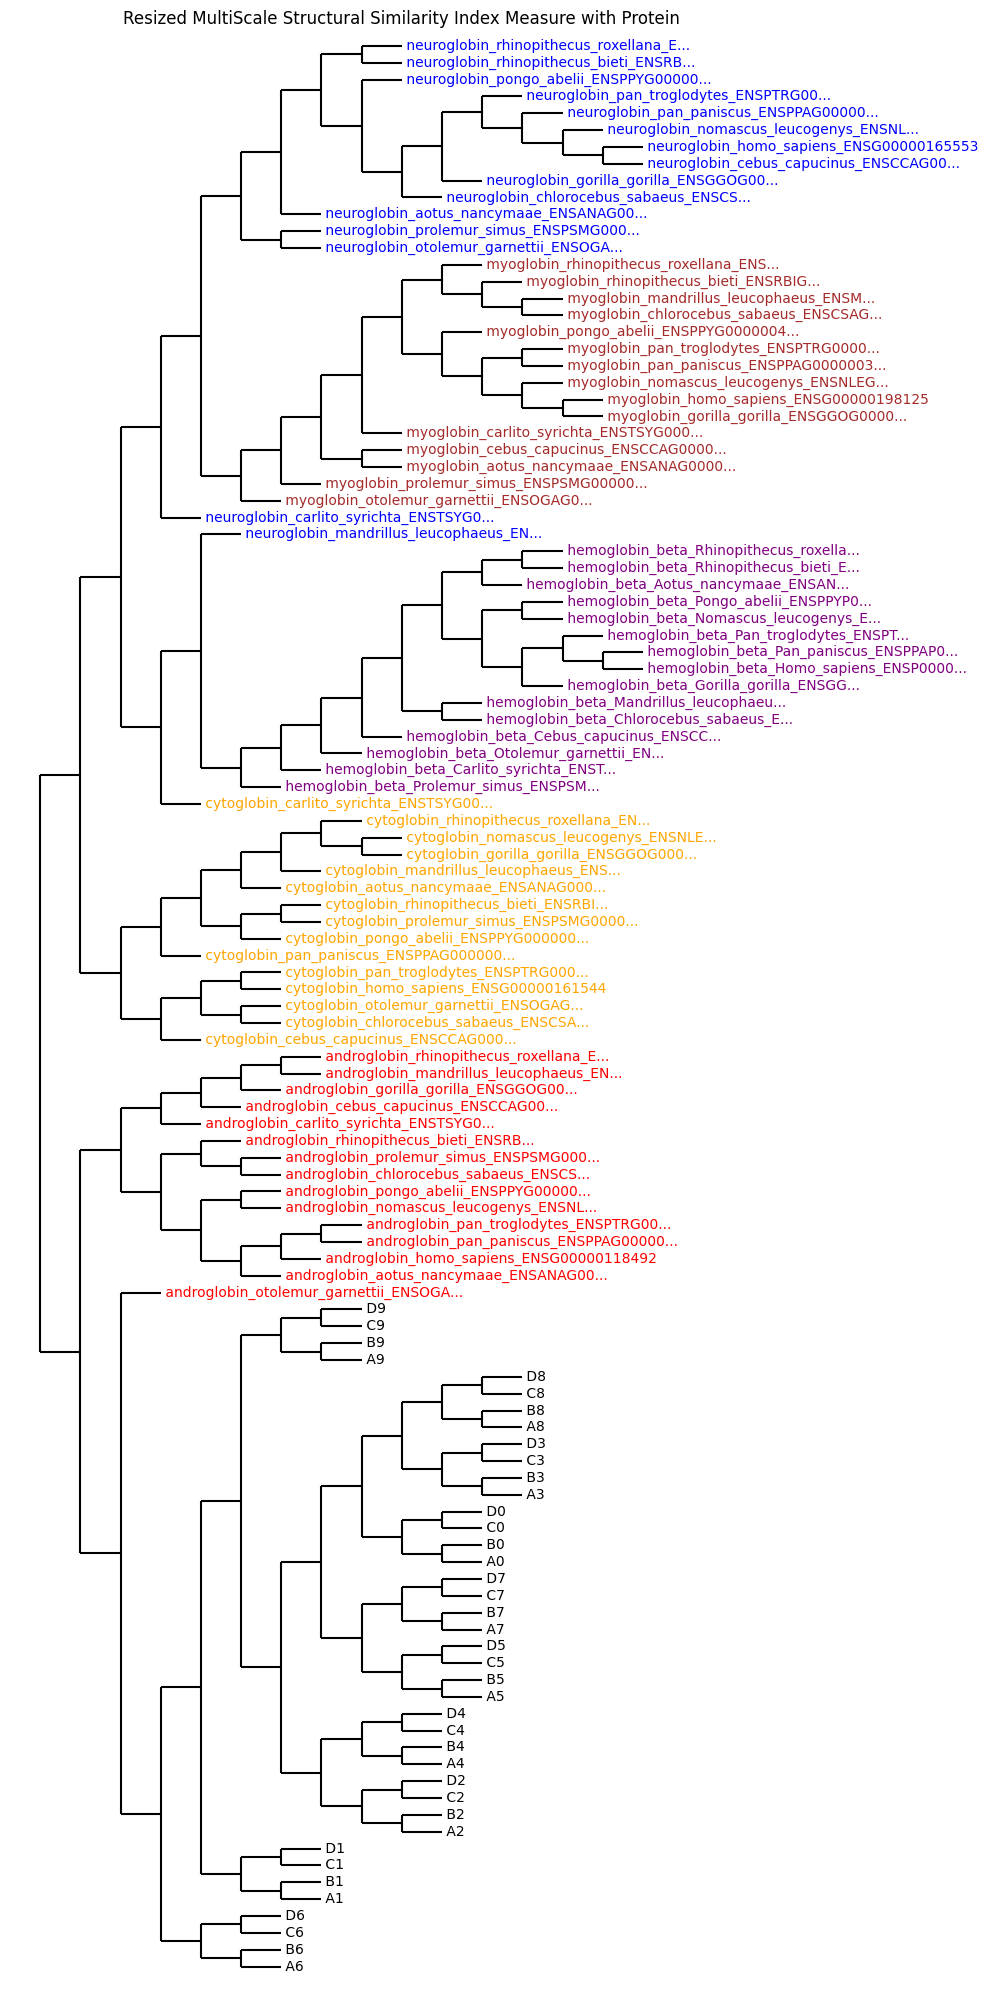

--------Windowed MultiScale Structural Similarity Index Measure with Protein--------
indelible
Precision: 0.0175
Mean Average Precision 0.011496416285344022
-------------------------------------------------
androglobin
Precision: 0.8095238095238095
Mean Average Precision 0.7484843346273262
-------------------------------------------------
cytoglobin
Precision: 0.8857142857142857
Mean Average Precision 0.9255957224010676
-------------------------------------------------
hemoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
myoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
neuroglobin
Precision: 0.9904761904761905
Mean Average Precision 0.986643450773519
-------------------------------------------------


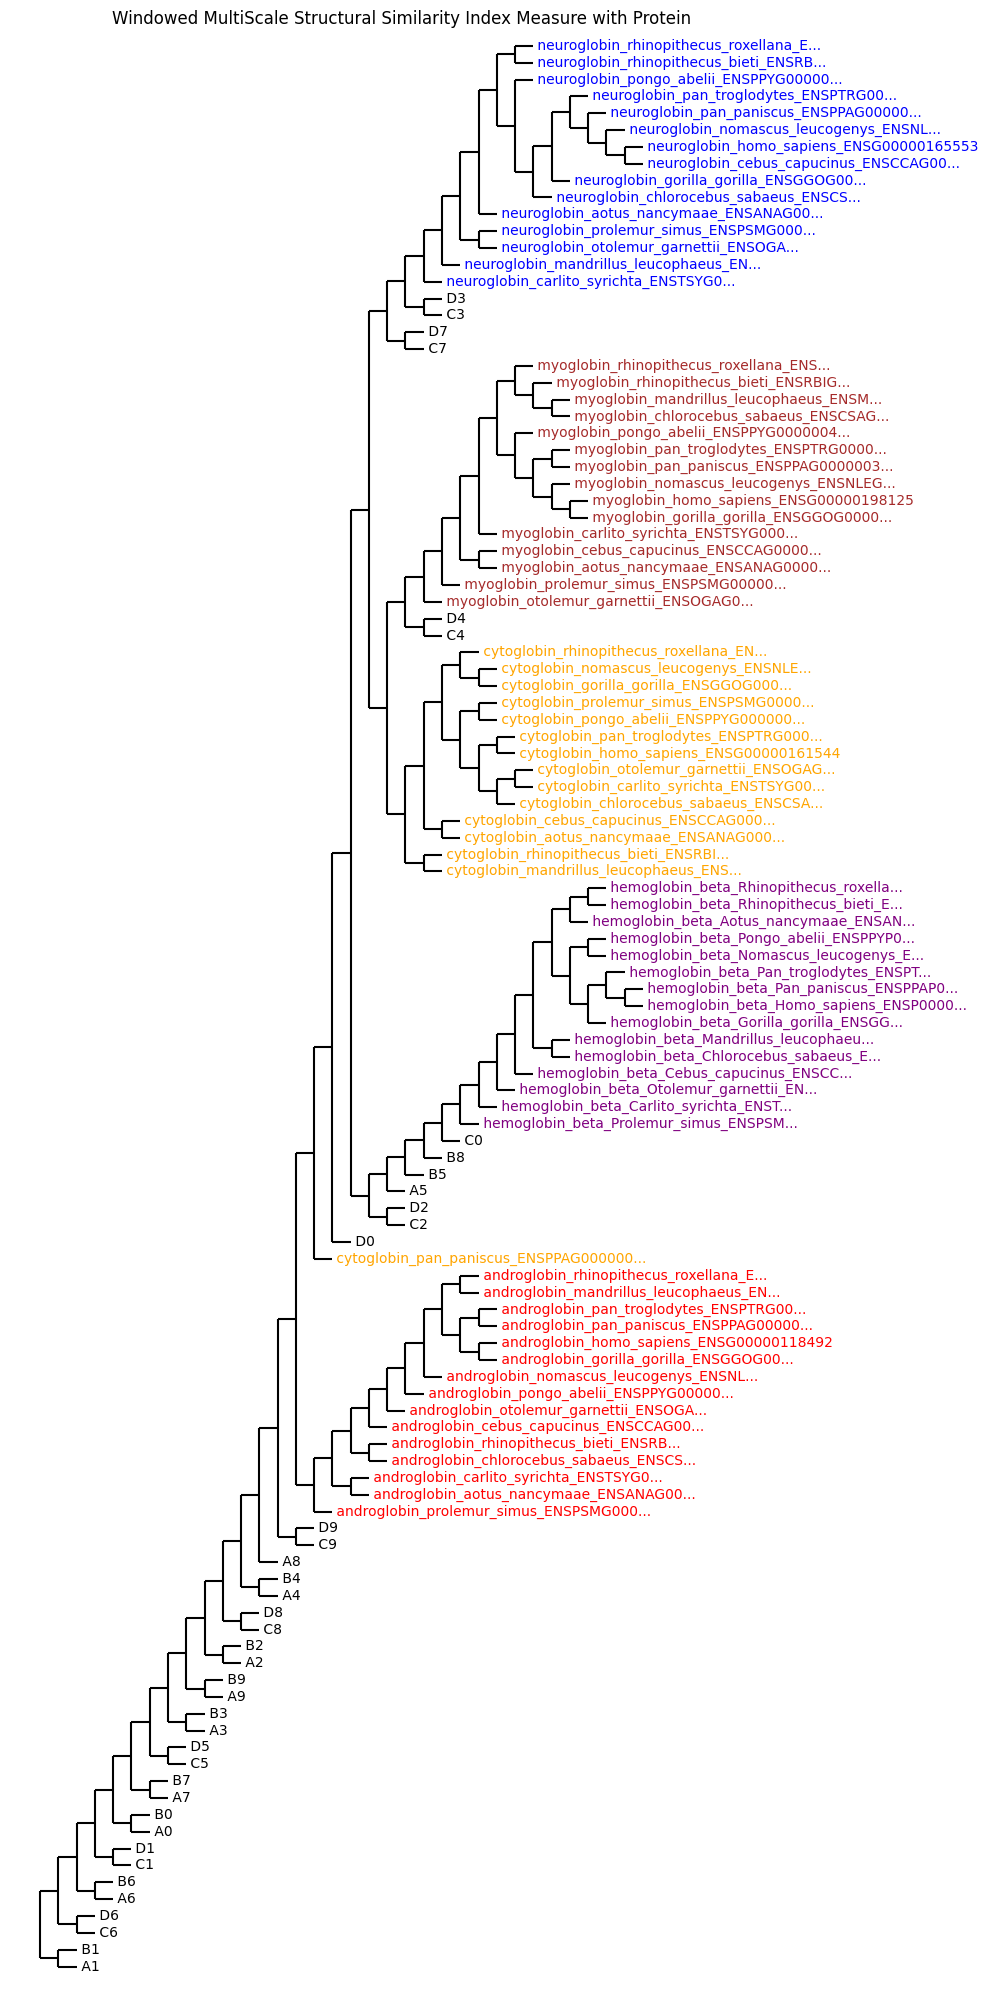

--------Greedy Sliced Structural Similarity Index Measure with Protein--------
indelible
Precision: 0.07375
Mean Average Precision 0.08275640835095524
-------------------------------------------------
androglobin
Precision: 0.45714285714285713
Mean Average Precision 0.32452211088537
-------------------------------------------------
cytoglobin
Precision: 0.7761904761904762
Mean Average Precision 0.7489829353286391
-------------------------------------------------
hemoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
myoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
neuroglobin
Precision: 0.7428571428571429
Mean Average Precision 0.6922355751409691
-------------------------------------------------


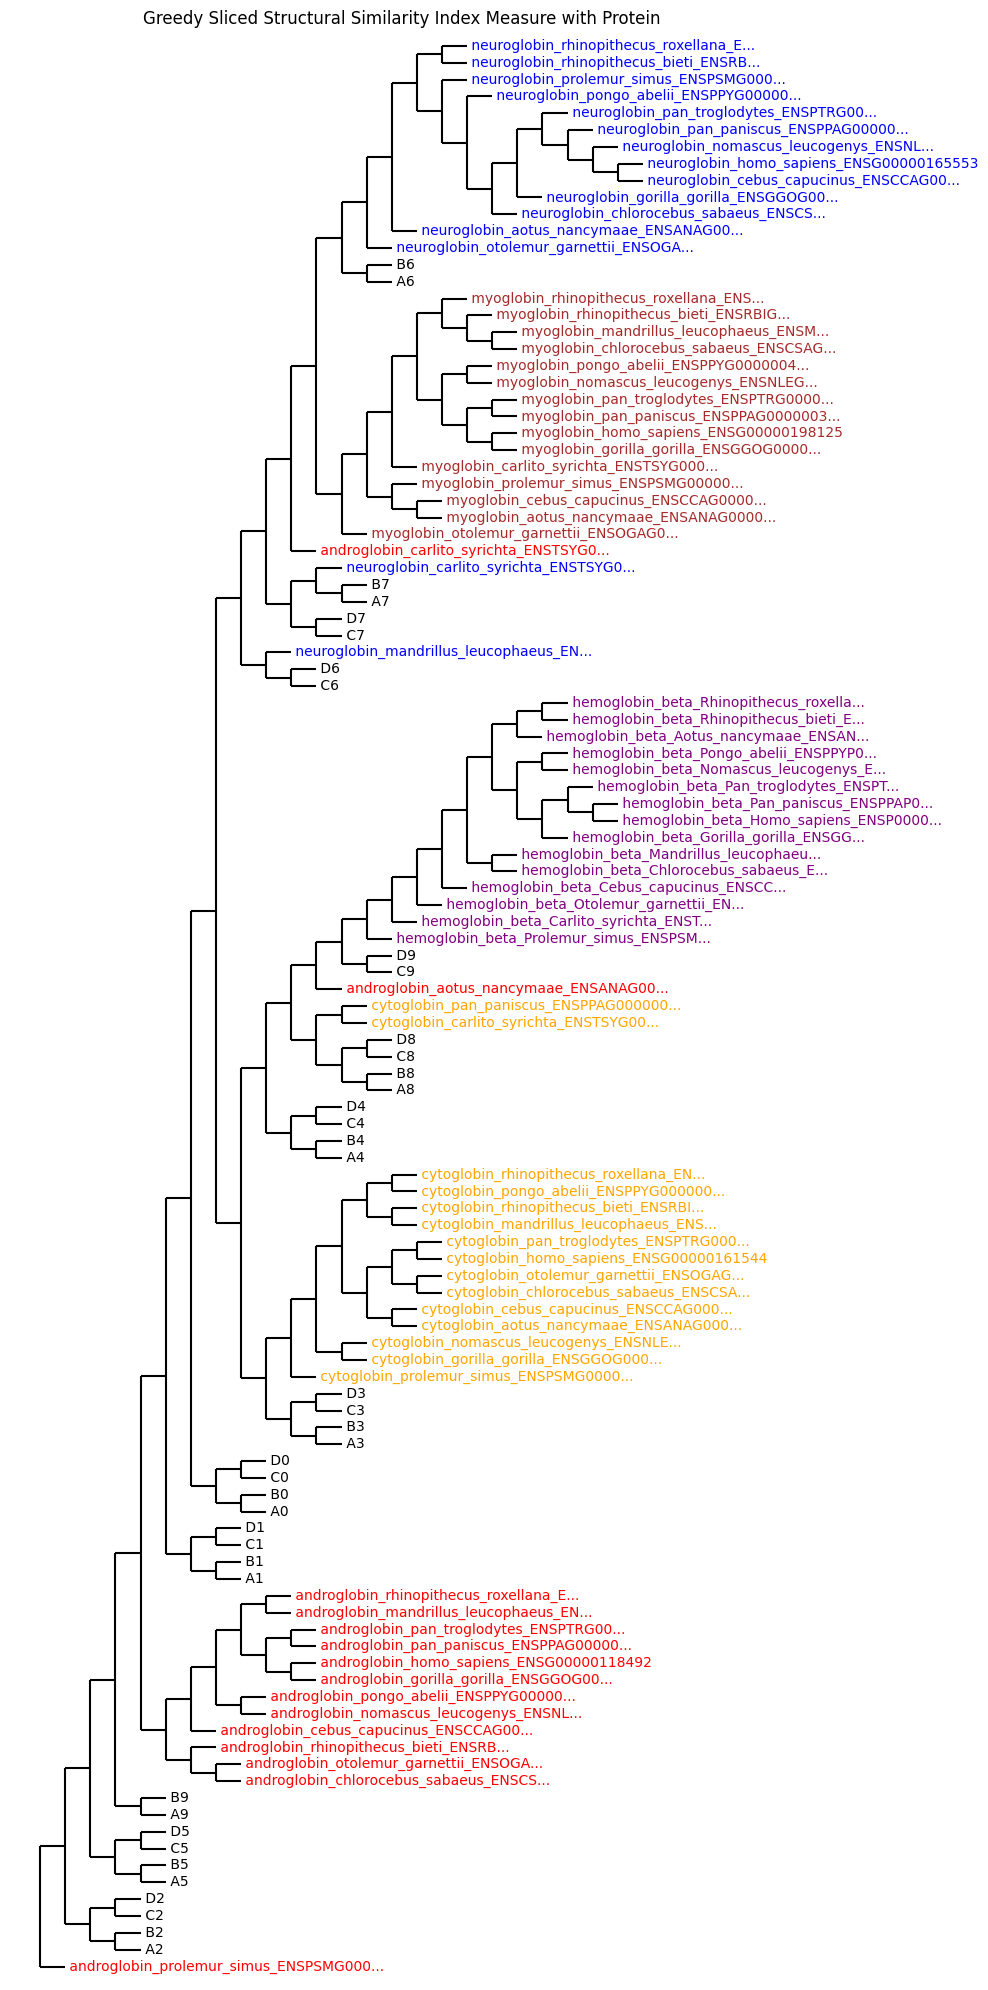

--------Unrestricted Sliced Structural Similarity Index Measure with Protein--------
indelible
Precision: 0.00125
Mean Average Precision 0.0004030428817283587
-------------------------------------------------
androglobin
Precision: 0.8047619047619048
Mean Average Precision 0.7480005754159166
-------------------------------------------------
cytoglobin
Precision: 0.8857142857142857
Mean Average Precision 0.9255957224010676
-------------------------------------------------
hemoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
myoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
neuroglobin
Precision: 0.9904761904761905
Mean Average Precision 0.986643450773519
-------------------------------------------------


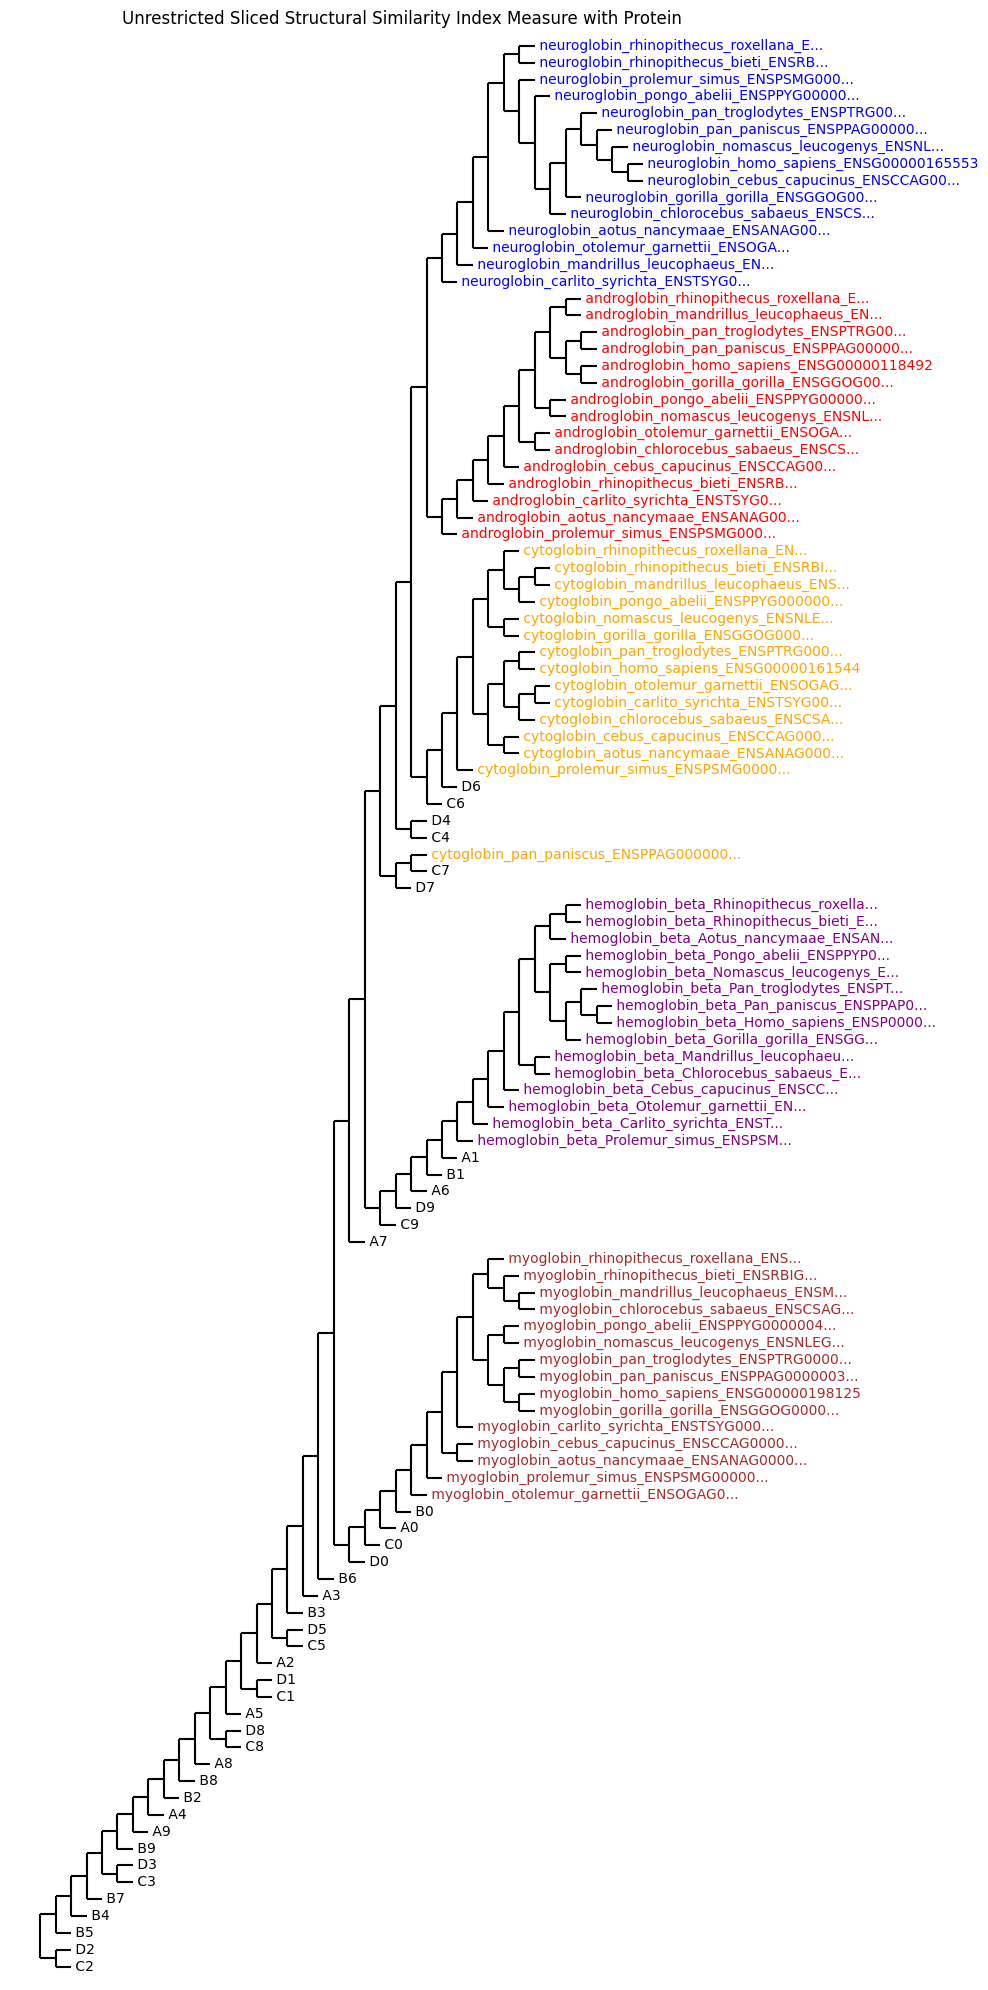

--------Universal Quality Index with Protein--------
indelible
Precision: 0.975
Mean Average Precision 0.9766871229250671
-------------------------------------------------
androglobin
Precision: 0.8666666666666667
Mean Average Precision 0.9030845131822275
-------------------------------------------------
cytoglobin
Precision: 0.8476190476190476
Mean Average Precision 0.7784274115515516
-------------------------------------------------
hemoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
myoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
neuroglobin
Precision: 0.9952380952380953
Mean Average Precision 0.990308354737584
-------------------------------------------------


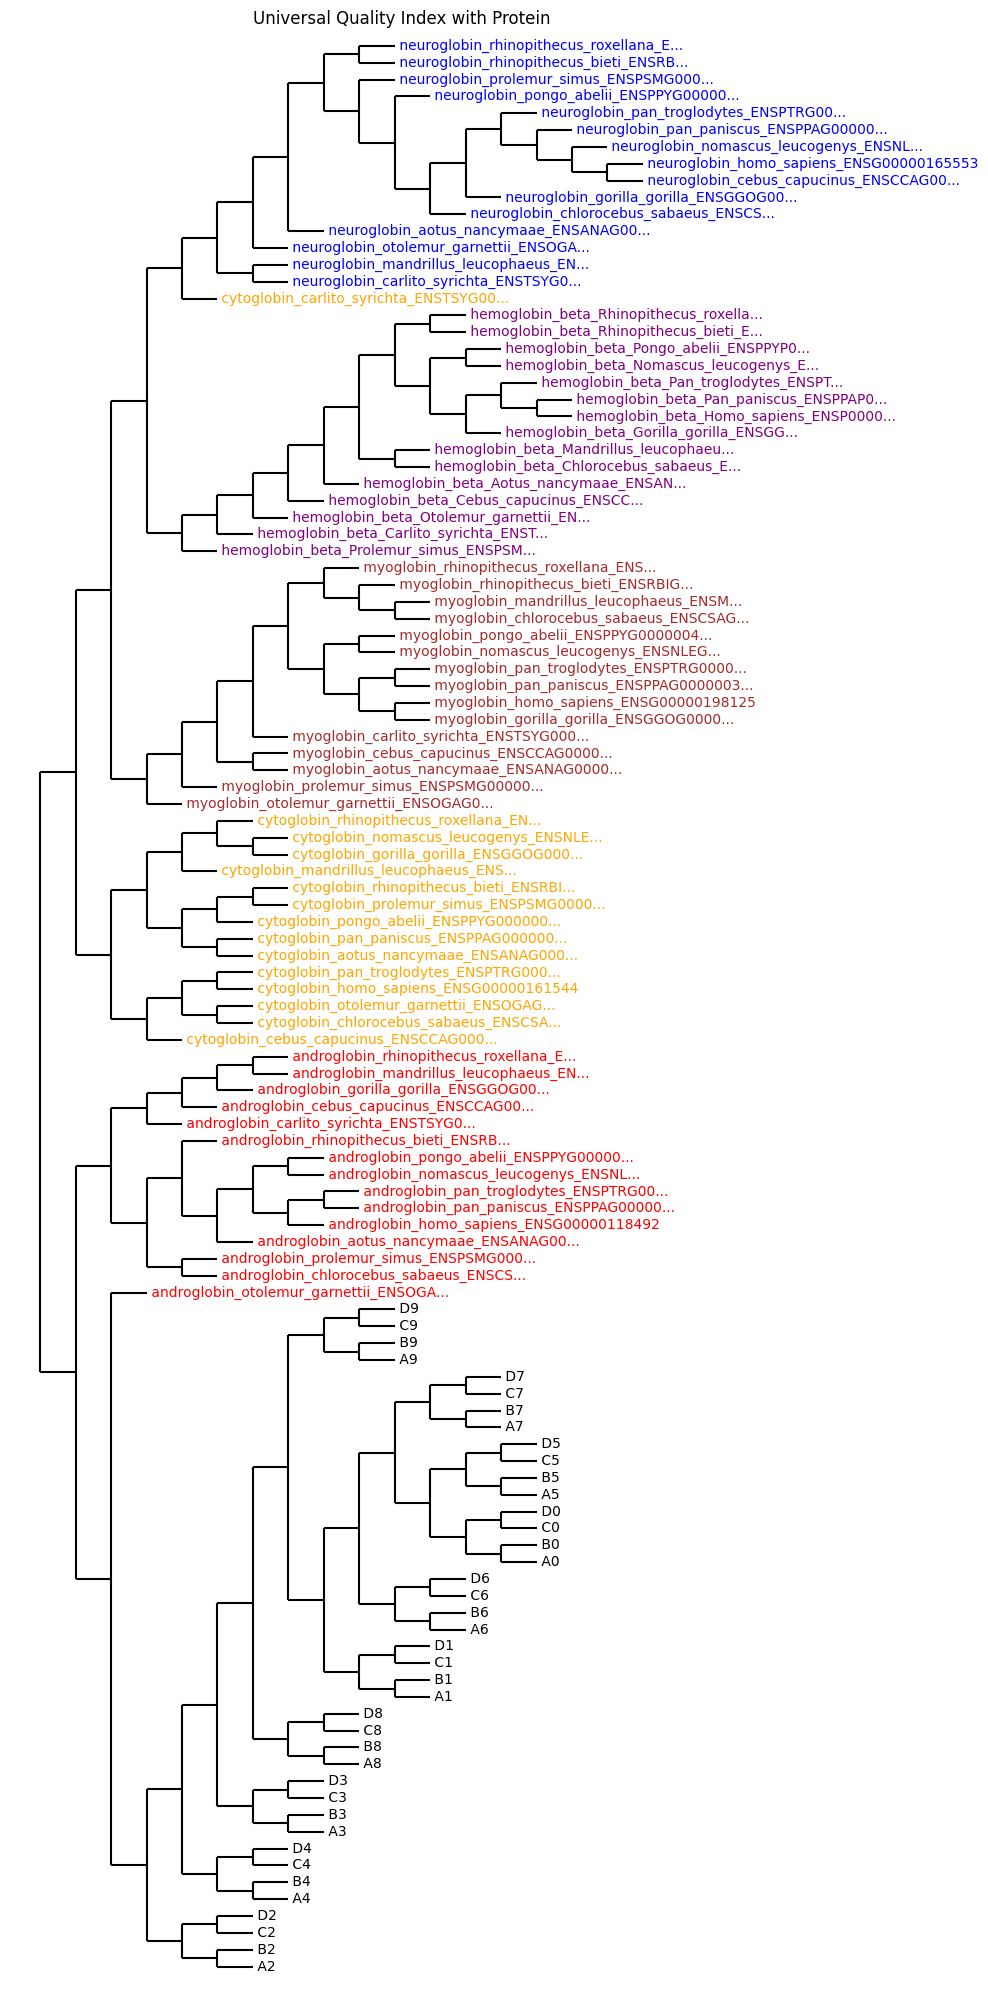

In [11]:
with open(f"{data_path}/cluster_sim.pkl", "rb") as f:
    sim_hash = pickle.load(f)
for types in sim_hash:
    for alg in sim_hash[types]:
        df_all = pandas.DataFrame.from_dict(sim_hash[types][alg])
        df_all.columns = [c.split("/")[-3].split(".")[0] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.columns]
        df_all.index = [c.split("/")[-3].split(".")[0] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.index]
        fixed_df_all = df_all.sort_index()[sorted(df_all.columns)]
        calc_map(types, alg, fixed_df_all)
        numpy_all = fixed_df_all.to_numpy(na_value=0)
        show_tree(types, alg, numpy_all)

In [12]:
for types in types_map.keys():
    dfs_control = {}
    control_dir = os.path.join(data_path, "blast", types)
    print(f"--------Results {types_map[types]}--------")
    for f in os.listdir(control_dir):
        if f.endswith(".csv"):
            name = f.split(".")[0]
            dfs_control[name] = pandas.read_csv(os.path.join(control_dir, f))
    for dataset, df_control in dfs_control.items():
        k=15 if "orthologs" in dataset else 40
        name = (dataset.replace("orthologs_", ""),) if "orthologs" in dataset else list(map("".join, itertools.product("ABCD", string.digits)))
        print(dataset)
        results = dfs_control[dataset].groupby("qseqid").head(k).groupby("qseqid").apply(
            lambda x: x["sseqid"].str.split("-", expand = True)[0].isin(name))
        print("Precision:", results.sum() / results.count())
        precision = [0]
        p_k = 0
        for i in results:
            precision.append(i+precision[-1])
        for k in range(1,len(precision)):
            p_k += precision[k]/k
        print("Mean Average Precision", p_k/results.count())
        display(results.groupby("qseqid").agg(right="sum", total="count"))
#         display(df_control.groupby("qseqid").head(k).pivot(index="qseqid", columns="sseqid", values="bitscore"))

--------Results with Protein--------
orthologs_cytoglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000037374,15,15
carlito_syrichta_ENSTSYG00000029754,15,15
cebus_capucinus_ENSCCAG00000037088,15,15
chlorocebus_sabaeus_ENSCSAG00000005082,15,15
gorilla_gorilla_ENSGGOG00000001385,15,15
homo_sapiens_ENSG00000161544,15,15
mandrillus_leucophaeus_ENSMLEG00000043678,15,15
nomascus_leucogenys_ENSNLEG00000002476,15,15
otolemur_garnettii_ENSOGAG00000034659,15,15


orthologs_androglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000025329,15,15
carlito_syrichta_ENSTSYG00000002644,15,15
cebus_capucinus_ENSCCAG00000032521,15,15
chlorocebus_sabaeus_ENSCSAG00000017175,15,15
gorilla_gorilla_ENSGGOG00000001069,15,15
homo_sapiens_ENSG00000118492,15,15
mandrillus_leucophaeus_ENSMLEG00000042349,15,15
nomascus_leucogenys_ENSNLEG00000015247,15,15
otolemur_garnettii_ENSOGAG00000024602,15,15


orthologs_hemoglobin_beta
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
Aotus_nancymaae_ENSANAP00000000486_Anan,15,15
Carlito_syrichta_ENSTSYP00000007411_Csyr,15,15
Cebus_capucinus_ENSCCAP00000028244_Ccap,15,15
Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,15,15
Gorilla_gorilla_ENSGGOP00000022371_Ggor,15,15
Homo_sapiens_ENSP00000333994_Hsap,15,15
Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,15,15
Nomascus_leucogenys_ENSNLEP00000021062_Nleu,15,15
Otolemur_garnettii_ENSOGAP00000006779_Ogar,15,15


orthologs_myoglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000020373,15,15
carlito_syrichta_ENSTSYG00000026219,15,15
cebus_capucinus_ENSCCAG00000031738,15,15
chlorocebus_sabaeus_ENSCSAG00000008174,15,15
gorilla_gorilla_ENSGGOG00000011478,15,15
homo_sapiens_ENSG00000198125,15,15
mandrillus_leucophaeus_ENSMLEG00000032335,15,15
nomascus_leucogenys_ENSNLEG00000014375,15,15
otolemur_garnettii_ENSOGAG00000005651,15,15


indelible
Precision: 0.588125
Mean Average Precision 0.5934550275847603


,right,total
qseqid,,
A0,23,40
A1,21,40
A2,23,40
A3,25,40
A4,18,40
A5,16,40
A6,25,40
A7,25,40
A8,27,40


orthologs_neuroglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000022420,15,15
carlito_syrichta_ENSTSYG00000026821,15,15
cebus_capucinus_ENSCCAG00000020944,15,15
chlorocebus_sabaeus_ENSCSAG00000011845,15,15
gorilla_gorilla_ENSGGOG00000006195,15,15
homo_sapiens_ENSG00000165553,15,15
mandrillus_leucophaeus_ENSMLEG00000035424,15,15
nomascus_leucogenys_ENSNLEG00000016682,15,15
otolemur_garnettii_ENSOGAG00000006194,15,15


--------Results with Nucleotides--------
fish_mito
Precision: 0.583
Mean Average Precision 0.6057173107272499


,right,total
qseqid,,
NC_009057,29,40
NC_009058,18,40
NC_009059,33,40
NC_009060,27,40
NC_009062,20,40
NC_009063,27,40
NC_009064,33,40
NC_009065,15,40
NC_009066,26,40


orthologs_cytoglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000037374,15,15
carlito_syrichta_ENSTSYG00000029754,15,15
cebus_capucinus_ENSCCAG00000037088,15,15
chlorocebus_sabaeus_ENSCSAG00000005082,15,15
gorilla_gorilla_ENSGGOG00000001385,15,15
homo_sapiens_ENSG00000161544,15,15
mandrillus_leucophaeus_ENSMLEG00000043678,15,15
nomascus_leucogenys_ENSNLEG00000002476,15,15
otolemur_garnettii_ENSOGAG00000034659,15,15


orthologs_androglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000025329,15,15
carlito_syrichta_ENSTSYG00000002644,15,15
cebus_capucinus_ENSCCAG00000032521,15,15
chlorocebus_sabaeus_ENSCSAG00000017175,15,15
gorilla_gorilla_ENSGGOG00000001069,15,15
homo_sapiens_ENSG00000118492,15,15
mandrillus_leucophaeus_ENSMLEG00000042349,15,15
nomascus_leucogenys_ENSNLEG00000015247,15,15
otolemur_garnettii_ENSOGAG00000024602,15,15


orthologs_hemoglobin_beta
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
Aotus_nancymaae_ENSANAP00000000486_Anan,15,15
Carlito_syrichta_ENSTSYP00000007411_Csyr,15,15
Cebus_capucinus_ENSCCAP00000028244_Ccap,15,15
Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,15,15
Gorilla_gorilla_ENSGGOP00000022371_Ggor,15,15
Homo_sapiens_ENSP00000333994_Hsap,15,15
Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,15,15
Nomascus_leucogenys_ENSNLEP00000021062_Nleu,15,15
Otolemur_garnettii_ENSOGAP00000006779_Ogar,15,15


orthologs_myoglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000020373,15,15
carlito_syrichta_ENSTSYG00000026219,15,15
cebus_capucinus_ENSCCAG00000031738,15,15
chlorocebus_sabaeus_ENSCSAG00000008174,15,15
gorilla_gorilla_ENSGGOG00000011478,15,15
homo_sapiens_ENSG00000198125,15,15
mandrillus_leucophaeus_ENSMLEG00000032335,15,15
nomascus_leucogenys_ENSNLEG00000014375,15,15
otolemur_garnettii_ENSOGAG00000005651,15,15


indelible
Precision: 0.6575
Mean Average Precision 0.6632178984228819


,right,total
qseqid,,
A0,25,40
A1,26,40
A2,28,40
A3,28,40
A4,24,40
A5,26,40
A6,22,40
A7,26,40
A8,32,40


orthologs_neuroglobin
Precision: 1.0
Mean Average Precision 1.0


,right,total
qseqid,,
aotus_nancymaae_ENSANAG00000022420,15,15
carlito_syrichta_ENSTSYG00000026821,15,15
cebus_capucinus_ENSCCAG00000020944,15,15
chlorocebus_sabaeus_ENSCSAG00000011845,15,15
gorilla_gorilla_ENSGGOG00000006195,15,15
homo_sapiens_ENSG00000165553,15,15
mandrillus_leucophaeus_ENSMLEG00000035424,15,15
nomascus_leucogenys_ENSNLEG00000016682,15,15
otolemur_garnettii_ENSOGAG00000006194,15,15


In [13]:
for types in types_map.keys():
    print(f"--------Results {types_map[types]}--------")
    control_tree = Tree(f"{data_path}/blast/{types}/db_blast_guided.nw", format=1)
    control_phylo_tree = Tree(f"{data_path}/blast/{types}/db_blast_phylo.nw", format=1)
    result_dict = {"control_guided":[], "control_phylo": []}
    print(control_tree.compare(control_phylo_tree, unrooted=True)["norm_rf"])
    indexes = []
    for file in os.listdir(f"{data_path}/blast/{types}/"):
        if file.endswith(".nw") and file.startswith("db_blast "):
            alg = file.split("db_blast ")[1].split(".")[0]
            tree = Tree(f"{data_path}/blast/{types}/{file}", format=1)
            result = control_tree.compare(tree, unrooted=True)
            result_dict["control_guided"].append(result["norm_rf"])
            result = control_phylo_tree.compare(tree, unrooted=True)
            result_dict["control_phylo"].append(result["norm_rf"])
            indexes.append(alg)
    display(pandas.DataFrame(result_dict, index=indexes))

--------Results with Protein--------
0.21428571428571427


,control_guided,control_phylo
Resized MultiScale Structural Similarity Index Measure,0.419643,0.455357
MultiScale Structural Similarity Index Measure Compat,0.652778,0.694444
Resized Structural Similarity Index Measure,0.446429,0.482143
Structural Similarity Index Measure Compat,0.666667,0.666667
MultiScale Structural Similarity Index Measure,0.596491,0.631579
Universal Quality Index,0.428571,0.464286
Windowed MultiScale Structural Similarity Index Measure,0.473214,0.500000
Unrestricted Sliced Structural Similarity Index Measure,0.571429,0.607143
Greedy Sliced Structural Similarity Index Measure,0.446429,0.482143
Universal Quality Index Compat,0.750000,0.763889


--------Results with Nucleotides--------
0.15178571428571427


,control_guided,control_phylo


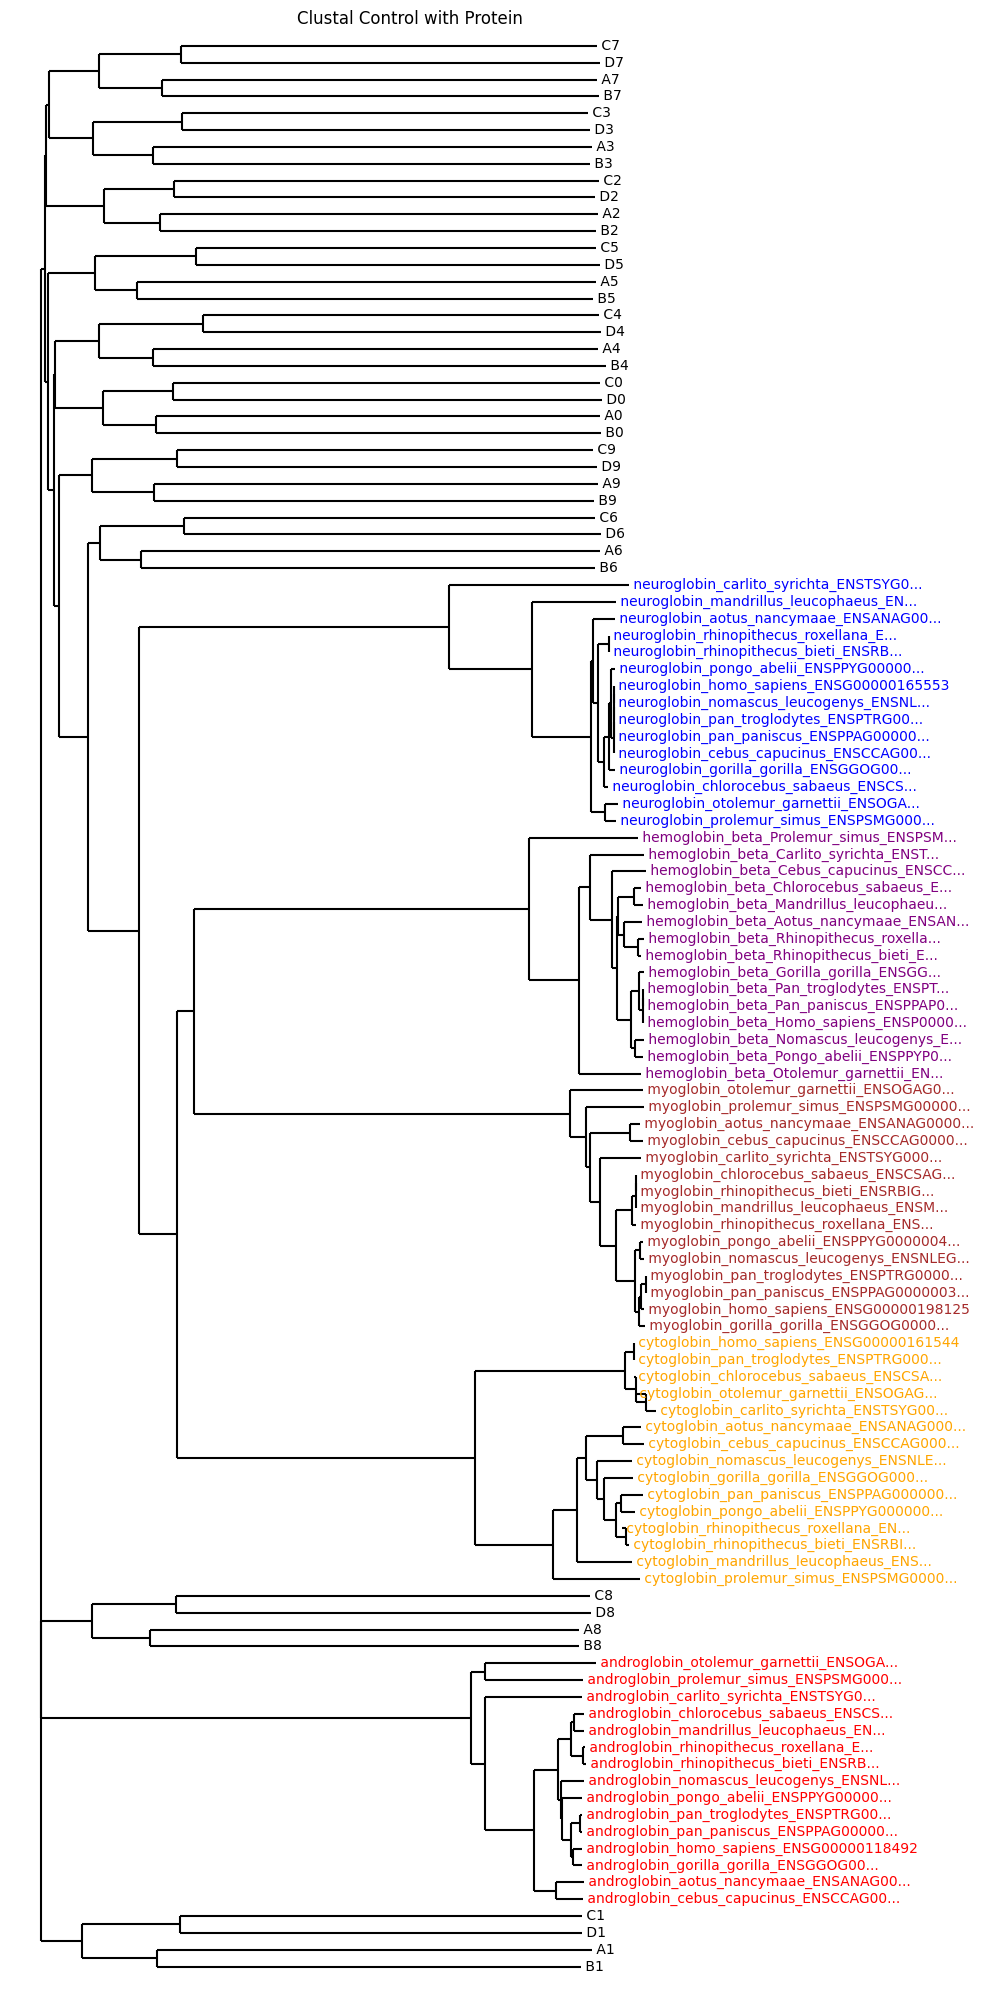

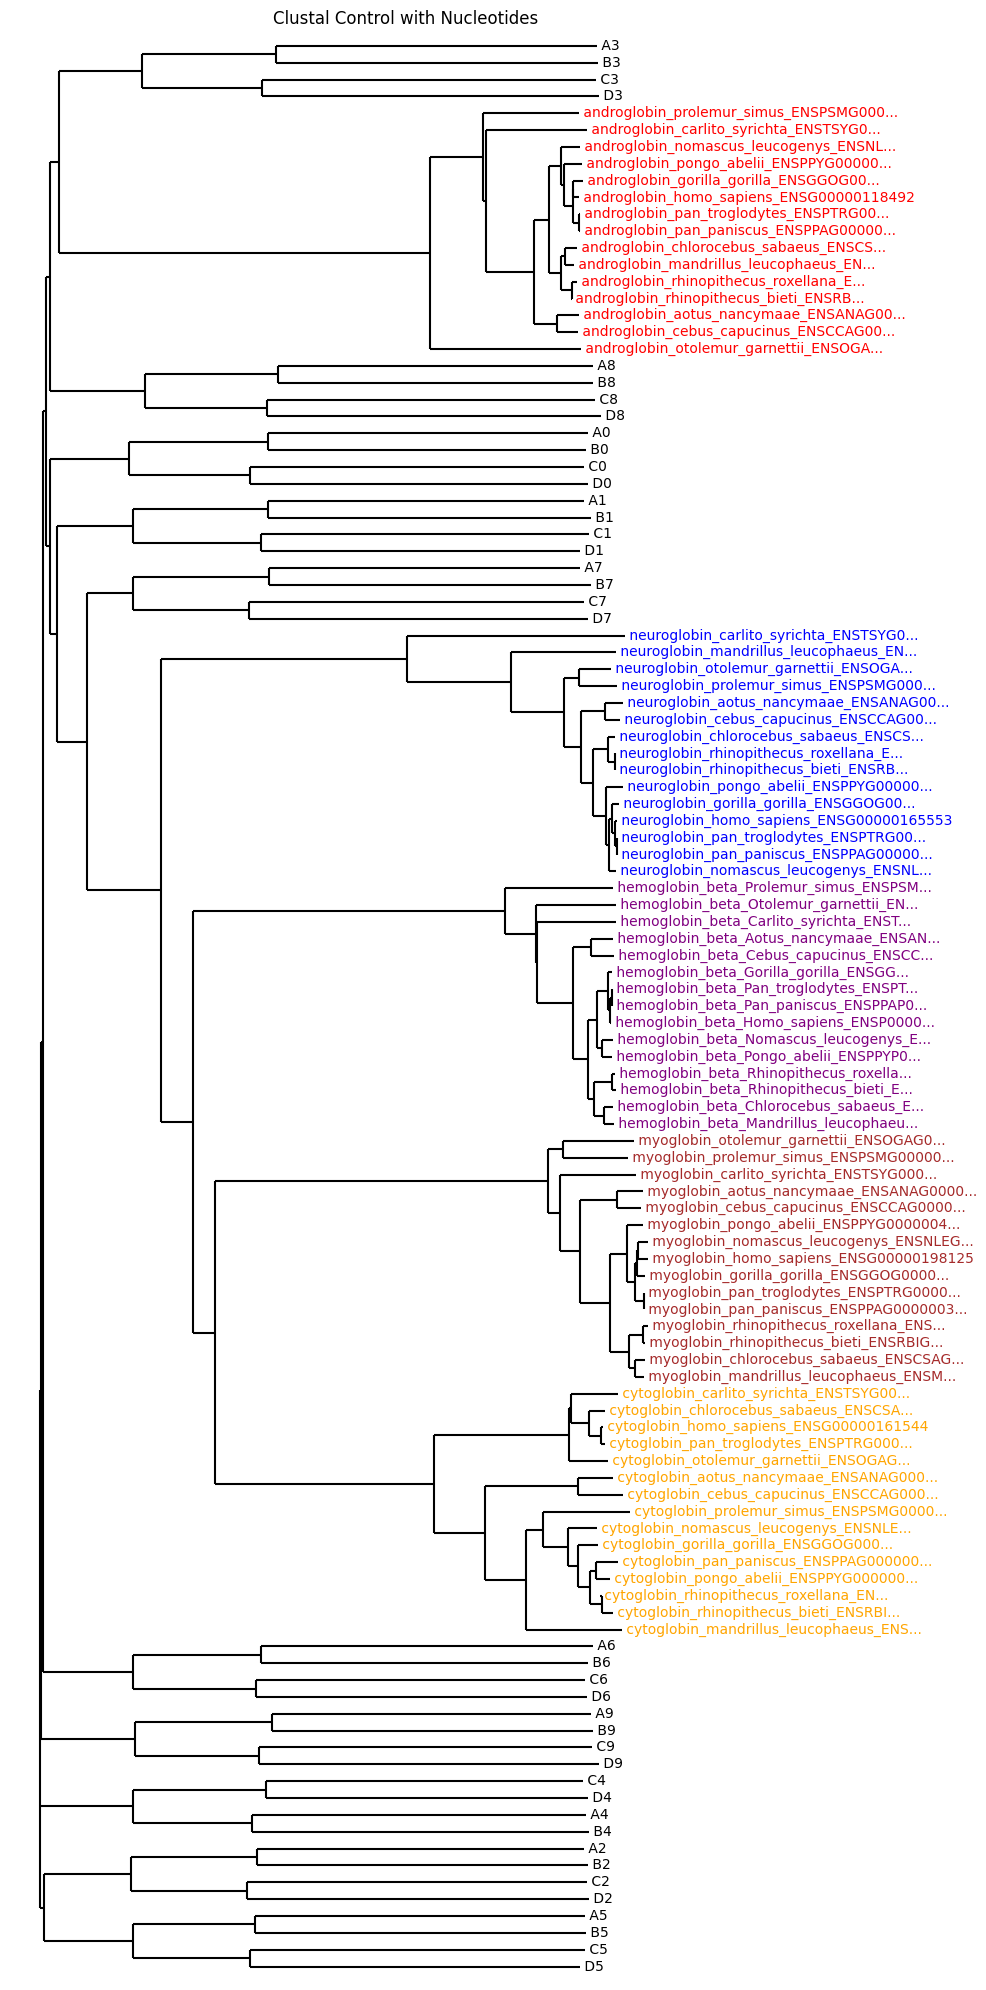

In [14]:
for types in types_map.keys():
    fig, ax = pyplot.subplots(1, 1, figsize=(10, 20), layout="constrained")
    t = Phylo.read(f"{data_path}/blast/{types}/db_blast_phylo.nw", "newick")
    # for a, b in itertools.product("ABCD", "0123456789"):
    #     c = next(t.find_clades(a+b))
    #     c.name = f"indelible_{c.name}"

    # t.ladderize()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Clustal Control {types_map[types]}")
    ax.axis('off')
    Phylo.draw(
        t,
        show_confidence=False,
        axes=ax,
        do_show=False,
        label_colors=color_clade,
        branch_labels=lambda clade: "" if not clade.name else "{:.2f}".format(
            clade.confidence) if clade.confidence else ""
    )
    pyplot.xlabel("")
    pyplot.ylabel("")
    pyplot.tight_layout()
    pyplot.show()